In [1]:
import os

In [2]:
import glob

In [3]:
from IPython.display import Image, display

In [4]:
!nvidia-smi

Wed May  8 01:24:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0              25W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
!pip install -U ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 kB 20.6 MB/s eta 0:00:0000:01


In [6]:
import ultralytics

In [7]:
ultralytics.checks()

Ultralytics YOLOv8.2.10 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5597.6/8062.4 GB disk)


In [17]:
!yolo task=detect mode=train model=yolov8s.pt data='/kaggle/input/flir-rgb-blurring-dataset/data.yaml' epochs=75 imgsz=640

Ultralytics YOLOv8.2.10 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/flir-rgb-blurring-dataset/data.yaml, epochs=75, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

In [9]:
Image(filename = f"/kaggle/working/runs/detect/train2/confusion_matrix_normalized.png", height = 400)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/runs/detect/train2/confusion_matrix_normalized.png'

In [ ]:
Image(filename = f"/kaggle/working/runs/detect/train2/F1_curve.png", height = 500)

In [ ]:
Image(filename = f"/kaggle/working/runs/detect/train2/results.png", height = 500)

In [ ]:
Image(filename = f"/kaggle/working/runs/detect/train2/val_batch0_pred.jpg", height = 500)

In [11]:
!yolo task=detect mode=val model='/kaggle/working/runs/detect/train2/weights/last.pt' data='/kaggle/input/thermal-rgb-dataset-autorobo/data.yaml'

Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/input/thermal-rgb-dataset-autorobo/valid/labels... 503 ima
val: WARNING ⚠️ Cache directory /kaggle/input/thermal-rgb-dataset-autorobo/valid is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        503       4263      0.862      0.811      0.905      0.717
                   car        503       2005      0.881      0.772      0.892       0.71
                person        503       1103      0.868      0.838      0.929      0.738
         traffic light        503       1155      0.836      0.824      0.893      0.704
Speed: 0.6ms preprocess, 5.3ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [18]:
!yolo task=detect mode=val model='/kaggle/working/runs/detect/train/weights/best.pt' data='/kaggle/input/flir-rgb-blurring-dataset/data.yaml'

Ultralytics YOLOv8.2.10 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/input/flir-rgb-blurring-dataset/valid/labels... 503 images
val: WARNING ⚠️ Cache directory /kaggle/input/flir-rgb-blurring-dataset/valid is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        503       1460      0.846      0.842      0.922      0.792
                   Car        503        490      0.905      0.888      0.961       0.89
                Person        503        167      0.804      0.833       0.91      0.772
         Traffic Light        503        803      0.829      0.806      0.894      0.715
Speed: 0.6ms preprocess, 5.1ms inference, 0.0ms loss, 6.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [20]:
!yolo task=detect mode=predict model='/kaggle/working/runs/detect/train/weights/best.pt' conf=0.45 source='/kaggle/input/flir-rgb-blurring-dataset/test/images'

Ultralytics YOLOv8.2.10 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/42 /kaggle/input/flir-rgb-blurring-dataset/test/images/FLIR_video_00048_jpg.rf.69b1897d28eb0731e407b254a41899b5.jpg: 640x640 2 Cars, 2 Traffic Lights, 7.7ms
image 2/42 /kaggle/input/flir-rgb-blurring-dataset/test/images/FLIR_video_00069_jpg.rf.1fbda6af0826fa678f7918d7da62f0ea.jpg: 640x640 2 Cars, 1 Traffic Light, 7.9ms
image 3/42 /kaggle/input/flir-rgb-blurring-dataset/test/images/FLIR_video_00179_jpg.rf.ba020294d5759ca64f7db4207f14adf5.jpg: 640x640 1 Car, 2 Traffic Lights, 7.8ms
image 4/42 /kaggle/input/flir-rgb-blurring-dataset/test/images/FLIR_video_00188_jpg.rf.a510efc93a99ae2a5832bfdbcd89152b.jpg: 640x640 (no detections), 7.8ms
image 5/42 /kaggle/input/flir-rgb-blurring-dataset/test/images/FLIR_video_00224_jpg.rf.5fa1d5067d4ff46cc802205c586b3364.jpg: 640x640 3 Cars, 2 Traffic Lights, 7.9ms
image 6/42 

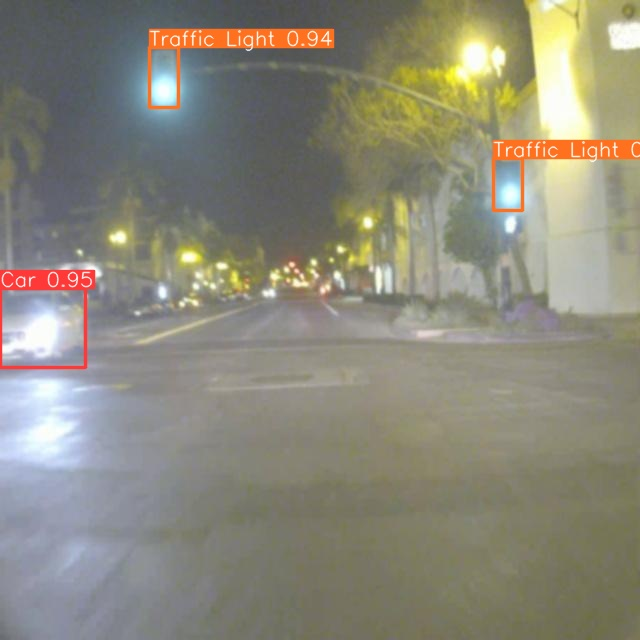

In [34]:
Image(filename = f"/kaggle/working/runs/detect/predict/FLIR_video_00179_jpg.rf.ba020294d5759ca64f7db4207f14adf5.jpg", height = 500)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!cd /kaggle/working

In [ ]:
!ls

In [1]:
!zip -r detect.zip /kaggle/working/runs/detect

  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/train2/ (stored 0%)
  adding: kaggle/working/runs/detect/train2/train_batch14887.jpg (deflated 7%)
  adding: kaggle/working/runs/detect/train2/R_curve.png (deflated 10%)
  adding: kaggle/working/runs/detect/train2/train_batch14886.jpg (deflated 9%)
  adding: kaggle/working/runs/detect/train2/results.png (deflated 8%)
  adding: kaggle/working/runs/detect/train2/train_batch2.jpg (deflated 3%)
  adding: kaggle/working/runs/detect/train2/PR_curve.png (deflated 12%)
  adding: kaggle/working/runs/detect/train2/weights/ (stored 0%)
  adding: kaggle/working/runs/detect/train2/weights/best.pt (deflated 8%)
  adding: kaggle/working/runs/detect/train2/weights/last.pt (deflated 8%)
  adding: kaggle/working/runs/detect/train2/val_batch1_labels.jpg (deflated 9%)
  adding: kaggle/working/runs/detect/train2/val_batch1_pred.jpg (deflated 8%)
  adding: kaggle/working/runs/detect/train2/events.out.tfevents.1713785212.f

In [13]:
!rm -rf /kaggle/working/detect.zip

In [12]:
!yolo predict model="/kaggle/working/runs/detect/train2/weights/best.pt" source="/kaggle/input/thermal-rgb-dataset-autorobo/test/images"

Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/42 /kaggle/input/thermal-rgb-dataset-autorobo/test/images/FLIR_video_00129_jpg.rf.234d140a0c67134c7826d0848b704e93.jpg: 640x640 6 cars, 2 traffic lights, 7.6ms
image 2/42 /kaggle/input/thermal-rgb-dataset-autorobo/test/images/FLIR_video_00191_jpg.rf.34cfc27bd09e2660116b1598c6c459c9.jpg: 640x640 8 cars, 2 traffic lights, 8.3ms
image 3/42 /kaggle/input/thermal-rgb-dataset-autorobo/test/images/FLIR_video_00372_jpg.rf.97be7f4f2f4b24e59a3815330cbd45e1.jpg: 640x640 8 cars, 7 traffic lights, 7.5ms
image 4/42 /kaggle/input/thermal-rgb-dataset-autorobo/test/images/FLIR_video_00438_jpg.rf.efc0b2bc14850dcf480c3cb97ea7019b.jpg: 640x640 6 cars, 1 traffic light, 7.5ms
image 5/42 /kaggle/input/thermal-rgb-dataset-autorobo/test/images/FLIR_video_00442_jpg.rf.5faafc1dd1e4eeb708f9ef8c2a02da00.jpg: 640x640 7 cars, 1 traffic l

In [1]:
!zip -r detect.zip /kaggle/working/runs/detect/predict

  adding: kaggle/working/runs/detect/predict/ (stored 0%)
  adding: kaggle/working/runs/detect/predict/FLIR_video_01373_jpg.rf.fc4f91a6addb32e955a2968eb268dbb2.jpg (deflated 4%)
  adding: kaggle/working/runs/detect/predict/FLIR_video_01451_jpg.rf.67d9baa495fc9c08780e130c881433c1.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/FLIR_video_01728_jpg.rf.1203f33913229f3d3d773b458d1346a3.jpg (deflated 4%)
  adding: kaggle/working/runs/detect/predict/FLIR_video_00069_jpg.rf.1fbda6af0826fa678f7918d7da62f0ea.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/FLIR_video_03564_jpg.rf.e75cc70a8220f164fa800ef7c740845c.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/predict/FLIR_video_00188_jpg.rf.a510efc93a99ae2a5832bfdbcd89152b.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/FLIR_video_03321_jpg.rf.1673503680bcdb0cf11bcab1686d3ac2.jpg (deflated 3%)
  adding: kaggle/working/runs/detect/predict/FLIR_video_04114_jpg.rf.10871f37642d70a384facf2315c98443.

In [16]:
!rm -rf /kaggle/working/detect.zip